In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import yfinance as yf
import datetime

# Pobierz dane
start_date = datetime.datetime(2020, 10, 5)
end_date = datetime.datetime(2023, 3, 13)
symbol = "BTC-USD"
data = yf.download(symbol, start=start_date, end=end_date)

# Usuń niepotrzebne kolumny
# data = data[['Close']]
df = data[['Close']]
# df['Date'] = data.index

# Normalizacja danych
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Podział danych na zbiór treningowy i testowy
prediction_days = 60
train_data = scaled_data[:-prediction_days] # = [len(scaled_data) - prediction_days]
test_data = scaled_data[-prediction_days:]

# Przygotowanie danych treningowych
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
train_data

[*********************100%***********************]  1 of 1 completed


/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_89902/144404572.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = data.index


array([[0.00331681],
       [0.        ],
       [0.00113342],
       [0.00546464],
       [0.00807641],
       [0.01214757],
       [0.01368929],
       [0.01669446],
       [0.01442167],
       [0.014485  ],
       [0.0156409 ],
       [0.01259983],
       [0.01323145],
       [0.0154304 ],
       [0.0199716 ],
       [0.02303148],
       [0.03896048],
       [0.0414569 ],
       [0.04085382],
       [0.04395277],
       [0.04260296],
       [0.0433767 ],
       [0.05354078],
       [0.04681821],
       [0.04974291],
       [0.05165013],
       [0.05576639],
       [0.05499596],
       [0.05171976],
       [0.05873863],
       [0.0619584 ],
       [0.08734605],
       [0.08710084],
       [0.07424803],
       [0.08558557],
       [0.08300049],
       [0.08227347],
       [0.08947888],
       [0.09957332],
       [0.10030125],
       [0.09591819],
       [0.09394231],
       [0.10729363],
       [0.12360781],
       [0.12639209],
       [0.12662179],
       [0.1407403 ],
       [0.141

In [4]:

# Zbudowanie modelu LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics="accuracy")
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=())


2023-03-15 04:20:49.588804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-15 04:20:49.589533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Epoch 1/20


2023-03-15 04:20:50.424768: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-15 04:20:52.293816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-15 04:20:52.508864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-15 04:20:52.684922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-15 04:20:52.798667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-15 04:20:53.103444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-15 04:20:53.383848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114

25/25 [==============================] - 7s 132ms/step - loss: 0.0505 - accuracy: 0.0013
Epoch 2/20
25/25 [==============================] - 1s 52ms/step - loss: 0.0105 - accuracy: 0.0013
Epoch 3/20
25/25 [==============================] - 1s 45ms/step - loss: 0.0082 - accuracy: 0.0013
Epoch 4/20
25/25 [==============================] - 1s 54ms/step - loss: 0.0079 - accuracy: 0.0013
Epoch 5/20
25/25 [==============================] - 1s 53ms/step - loss: 0.0072 - accuracy: 0.0013
Epoch 6/20
25/25 [==============================] - 1s 49ms/step - loss: 0.0063 - accuracy: 0.0013
Epoch 7/20
25/25 [==============================] - 1s 44ms/step - loss: 0.0058 - accuracy: 0.0013
Epoch 8/20
25/25 [==============================] - 1s 42ms/step - loss: 0.0053 - accuracy: 0.0013
Epoch 9/20
25/25 [==============================] - 1s 44ms/step - loss: 0.0045 - accuracy: 0.0013
Epoch 10/20
25/25 [==============================] - 1s 50ms/step - loss: 0.0041 - accuracy: 0.0013
Epoch 11/20
25/25 [

In [62]:
# inputs[1, 0]

x_pred = [23320.347656]
x_pred = np.array(x_pred)
x_pred = np.reshape(x_pred, (x_pred.shape[0], 1, 1))

# Predykcja
y_pred = model.predict(x_pred)
y_pred = scaler.inverse_transform(y_pred)
y_pred


1/1 [==============================] - 0s 115ms/step


array([[159299.2]], dtype=float32)

2023-03-15 04:21:31.006763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-15 04:21:31.079631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-15 04:21:31.210185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-15 04:21:31.348479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 239ms/step


/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_89902/4253388606.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_closing_price
/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_89902/4253388606.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(df['Date'][:-prediction_days])
/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_89902/4253388606.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy

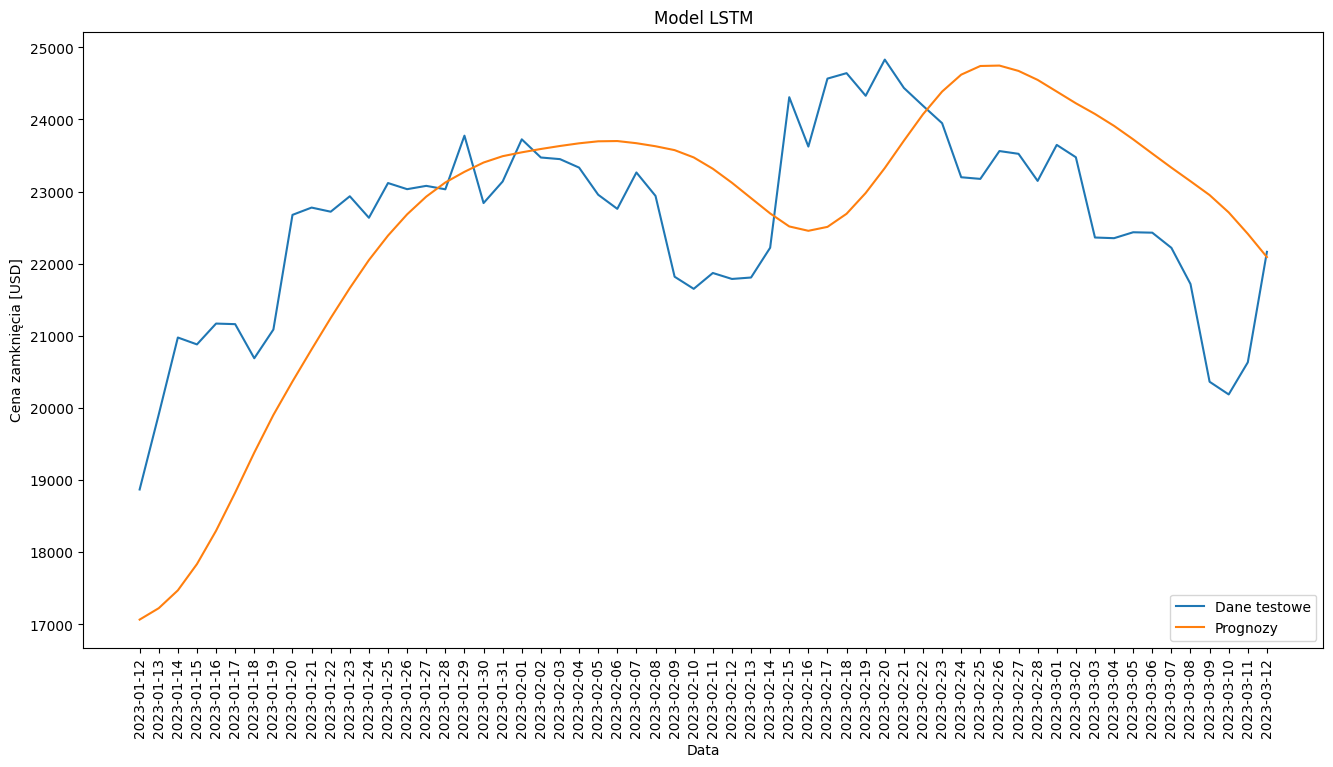

Date
2023-01-12    17065.753906
2023-01-13    17223.882812
2023-01-14    17471.132812
2023-01-15    17835.623047
2023-01-16    18297.419922
2023-01-17    18826.625000
2023-01-18    19380.923828
2023-01-19    19902.599609
2023-01-20    20367.072266
2023-01-21    20811.886719
2023-01-22    21246.492188
2023-01-23    21661.531250
2023-01-24    22050.048828
2023-01-25    22389.570312
2023-01-26    22684.087891
2023-01-27    22929.509766
2023-01-28    23125.939453
2023-01-29    23273.380859
2023-01-30    23402.150391
2023-01-31    23490.130859
2023-02-01    23543.607422
2023-02-02    23590.021484
2023-02-03    23631.595703
2023-02-04    23668.601562
2023-02-05    23696.400391
2023-02-06    23700.003906
2023-02-07    23670.132812
2023-02-08    23627.953125
2023-02-09    23574.101562
2023-02-10    23472.976562
2023-02-11    23315.871094
2023-02-12    23121.697266
2023-02-13    22908.699219
2023-02-14    22696.642578
2023-02-15    22516.171875
2023-02-16    22455.683594
2023-02-17    22510.189

In [5]:

# Przygotowanie danych testowych
inputs = df[len(df) - len(test_data) - 60:]['Close'].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predykcja
predicted_closing_price = model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# Wykres
import matplotlib.pyplot as plt

train = df[:-prediction_days]
valid = df[-prediction_days:]
valid['Predictions'] = predicted_closing_price
train['Date'] = pd.to_datetime(df['Date'][:-prediction_days])
valid['Date'] = pd.to_datetime(df['Date'][-prediction_days:])

startFrom = 3500
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia [USD]')
# plt.plot(train['Date'][startFrom:], train['Close'][startFrom:])
plt.plot(valid['Date'], valid[['Close']])
plt.plot(valid['Date'], valid[['Predictions']])
plt.legend([ 'Dane testowe', 'Prognozy'], loc='lower right')
plt.xticks(valid['Date'][::1], rotation=90)
plt.show()

valid['Predictions']

In [53]:
x_pred

array(23873.222656)